INTRODUCTION

Understanding and mitigating the risks associated with loan delinquency is crucial for lenders and borrowers in the complex financial management landscape. Loan delinquency, marked by a borrower's failure to make timely payments, can have significant repercussions for financial institutions and individuals. This analysis delves into the multifaceted factors contributing to loan delinquency, aiming to unravel the intricate web of elements ranging from credit history and income stability to market conditions and regulatory influences. By peeling back, the layers of this financial challenge, we seek to develop insights and strategies that empower lenders to make informed decisions, reduce risk, and foster a more resilient and sustainable lending environment. Join me on this exploration as we navigate the intricacies of loan delinquency analysis and its implications in the ever-evolving world of finance.

RESEARCH QUESTION

What are the factors contributing to borrowers' failure to make timely payments?

OBJECTIVE

The objective of this analysis is to assess and understand the factors contributing to borrowers' failure to make timely payments on their loans. This analysis is so important for financial institutions, lenders, and credit providers to manage and mitigate the risks associated with delinquent loans. 
As a data analyst we will analyze the data provided and build a model to identify factors that significantly influence delinquency loan and finaly we will give some recommendation to develop strategies to minimize financial losses associated with delinquent loans. This may involve restructuring loans, offering payment plans, or, in extreme cases, pursuing legal action to recover outstanding amounts.


### Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To get different metric scores and split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To help with model building
from sklearn.linear_model import LogisticRegression


# To use statistical functions
import scipy.stats as stats

# To suppress the warning
import warnings

warnings.filterwarnings("ignore")

### Loading Data

In [2]:
data = pd.read_csv("Loan_Delinquent_Dataset.csv")

### Data structure

In [3]:
# Checking the number of rows and columns in the data
data.shape

(11548, 8)

Observation 
Our data set has 11548 records for 8 variables

In [4]:
# let's create a copy of the data
loan = data.copy()

In [5]:
# let's view the first 5 rows of the data
loan.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [6]:
# let's view the last 5 rows of the data
loan.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


In [7]:
# let's check the data types of the columns in the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


## Converting object data type to category

*  Let us change term, gender, purpose,home_ownership, age and FICO data type to category data type to
 reduce the data space required to store the dataframe`

In [8]:
loan["term"] = loan["term"].astype("category")
loan["gender"] = loan["gender"].astype("category")
loan["purpose"] = loan["purpose"].astype("category")
loan["home_ownership"] = loan["home_ownership"].astype("category")
loan["age"] = loan["age"].astype("category")
loan["FICO"] = loan["FICO"].astype("category")
loan["isDelinquent"] = loan["isDelinquent"].astype("category")

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              11548 non-null  int64   
 1   isDelinquent    11548 non-null  category
 2   term            11548 non-null  category
 3   gender          11548 non-null  category
 4   purpose         11548 non-null  category
 5   home_ownership  11548 non-null  category
 6   age             11548 non-null  category
 7   FICO            11548 non-null  category
dtypes: category(7), int64(1)
memory usage: 170.4 KB


we can see that the memory usage has decreased from 721.9KB to 170.2KB

Observation
* All the dependent variables except for ID are categorical.


In [10]:
# let's check for duplicate values in the data
loan.duplicated().sum()

0

In [11]:
# let's check for missing values in the data
loan.isnull().sum()

ID                0
isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

- There are no missing values in the data

In [12]:
# let's view the statistical summary of the numerical columns in the data
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.0,11548,11548,11548,11548,11548,11548
unique,NaN,2.0,2,2,7,3,2,2
top,NaN,1.0,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,7721.0,10589,6555,6892,5461,5888,6370
mean,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**   

* Most of the customers are loan delinquent(1)
* Most of the loans are for a 36-month term loan
* More males have applied for loans than females
* Most loan applications are for house loans
* Most customers have either mortgaged their houses
* Mostly customers in the age group 20-25 have applied for a loan
* Most customers have a FICO score between 300 and 500

## Data Pre-Processing

In [13]:
# checking for unique values in the ID column
loan["ID"].nunique()

11548

* Since all the values in the ID column are unique we can drop it

In [14]:
loan.drop(["ID"], axis=1, inplace=True)

In [15]:
# checking unique value in purpose
loan["purpose"].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']

In [16]:
# We can merge the purpose -  'other' and 'Other' together
loan["purpose"].replace("other", "Other", inplace=True)

In [17]:
loan["purpose"].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']
Categories (6, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding']

### Exploratory Data Analysis

### Univariate analysis

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on isDelinquent

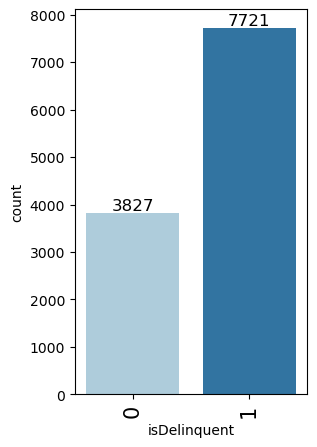

In [19]:
labeled_barplot(loan, "isDelinquent")

* 7721 out 11548 (66%) of the customers are delinquent

## Observations on term

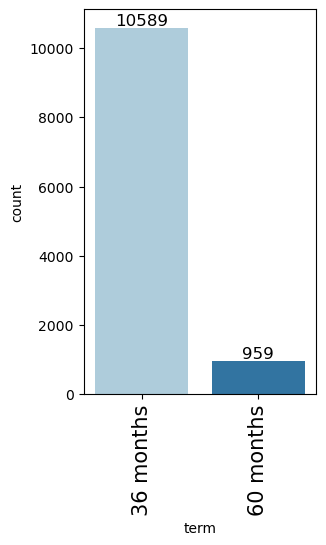

In [20]:
labeled_barplot(loan, "term")

* 10589 out 11548 (91%) of the loans are for a 36-month term.

## Observations on gender

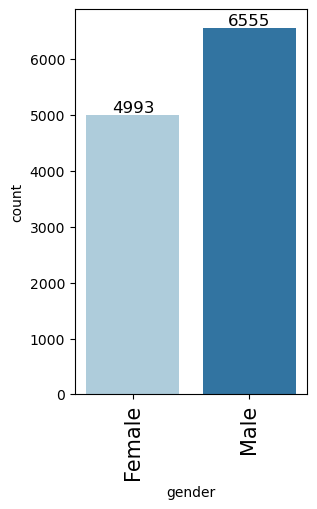

In [21]:
labeled_barplot(loan, "gender")

* There are more male applicants (56.8%) than female applicants (43.2%)

## Observations on purpose

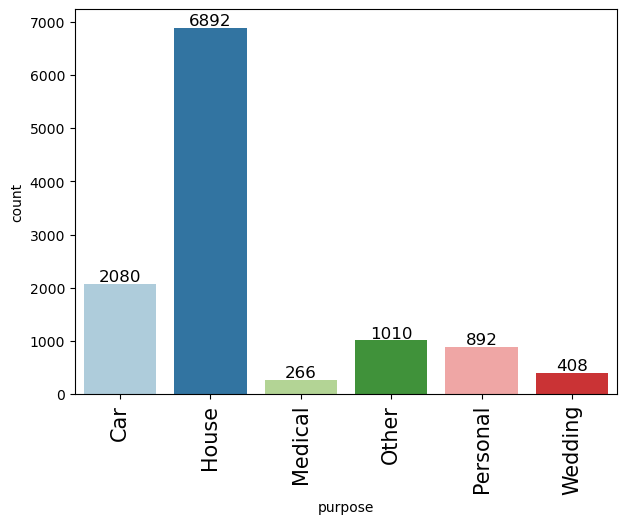

In [22]:
labeled_barplot(loan, "purpose")

* Most loan applications are for house loans (59.7%) followed by car loans (18%)
* There are 2 levels named 'other' and 'Other' under the purpose variable. Since we do not have any other information about these, we can merge these levels.

## Observations on home_ownership

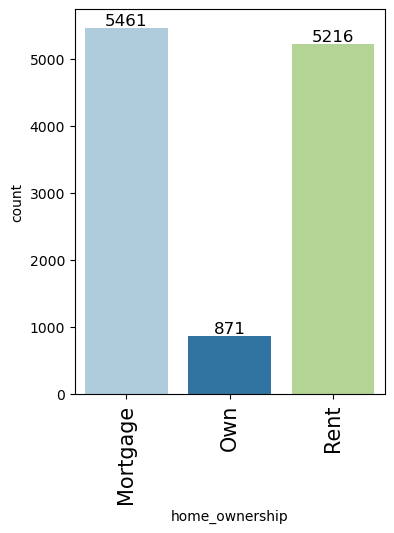

In [23]:
labeled_barplot(loan, "home_ownership")

* Very few applicants 871 out 11548 (less than 10%) own their house, Most customers have either mortgaged their houses or live on rent. 

## Observations on age

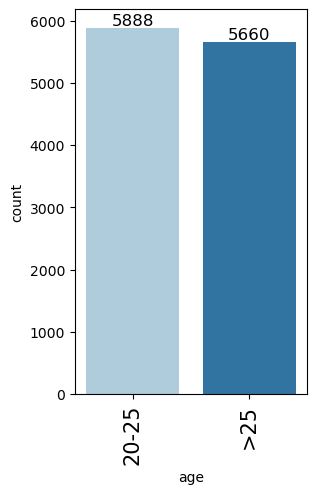

In [24]:
labeled_barplot(loan, "age")

* Almost an equal percentage of people aged 20-25 and >25 have applied for the loan.

## Observations on FICO

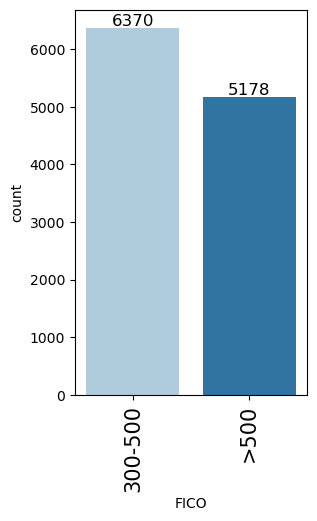

In [25]:
labeled_barplot(loan, "FICO")

* Most customers have a FICO score between 300 and 500 (55.2%) followed by a score of greater than 500 (44.8%)

In [26]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Bivariate Analysis

## term vs isDelinquent

isDelinquent     0     1    All
term                           
All           3827  7721  11548
36 months     3168  7421  10589
60 months      659   300    959
------------------------------------------------------------------------------------------------------------------------


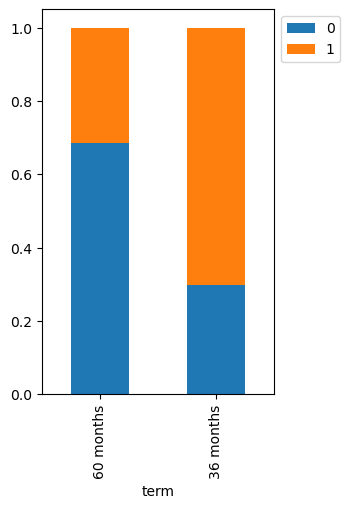

In [27]:
stacked_barplot(loan, "term", "isDelinquent")

* Most loan delinquent customers have taken loans for 36 months.

## gender vs isDelinquent

isDelinquent     0     1    All
gender                         
All           3827  7721  11548
Male          1977  4578   6555
Female        1850  3143   4993
------------------------------------------------------------------------------------------------------------------------


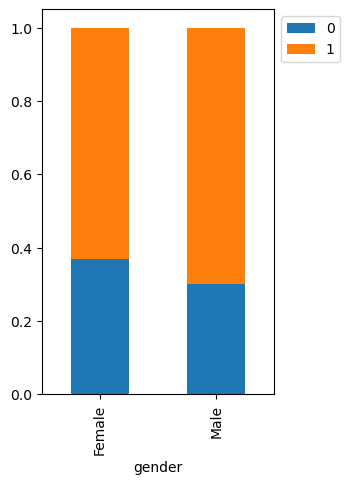

In [28]:
stacked_barplot(loan, "gender", "isDelinquent")

* There's not much difference between male and female customers.

## purpose vs isDelinquent

isDelinquent     0     1    All
purpose                        
All           3827  7721  11548
House         2272  4620   6892
Car            678  1402   2080
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
Medical        107   159    266
------------------------------------------------------------------------------------------------------------------------


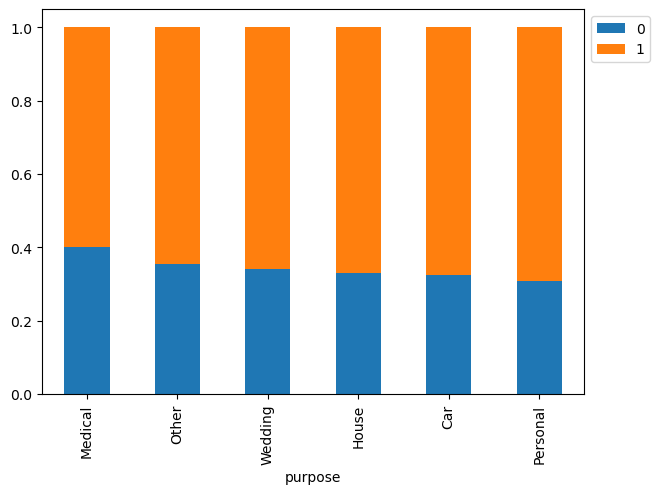

In [29]:
stacked_barplot(loan, "purpose", "isDelinquent")

* Most loan delinquent customers are those who have applied for house loans followed by car and personal loans.

## home_ownership vs isDelinquent

isDelinquent       0     1    All
home_ownership                   
All             3827  7721  11548
Mortgage        1831  3630   5461
Rent            1737  3479   5216
Own              259   612    871
------------------------------------------------------------------------------------------------------------------------


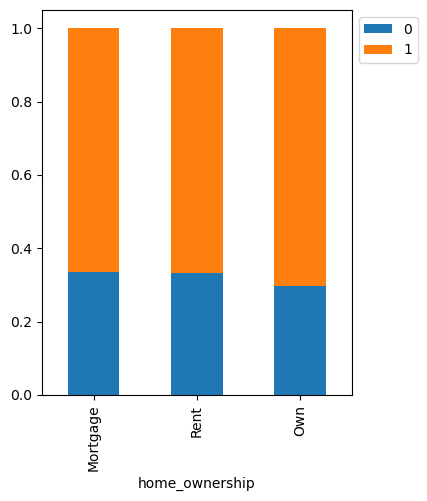

In [30]:
stacked_barplot(loan, "home_ownership", "isDelinquent")

* Those customers who have their own house are less delinquent than the ones who live in a rented place or have mortgaged their home.

## age vs isDelinquent

isDelinquent     0     1    All
age                            
All           3827  7721  11548
>25           1969  3691   5660
20-25         1858  4030   5888
------------------------------------------------------------------------------------------------------------------------


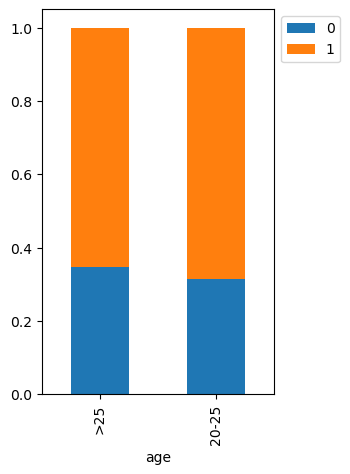

In [31]:
stacked_barplot(loan, "age", "isDelinquent")

* Customers between 20-25 years of age are more delinquent.

## FICO vs isDelinquent 

isDelinquent     0     1    All
FICO                           
All           3827  7721  11548
>500          2886  2292   5178
300-500        941  5429   6370
------------------------------------------------------------------------------------------------------------------------


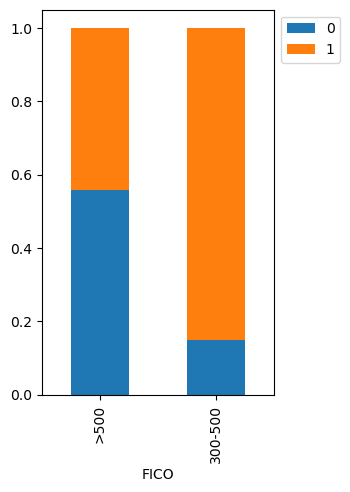

In [32]:
stacked_barplot(loan, "FICO", "isDelinquent")

Obsevation
If the FICO score is >500 the chances of delinquency decrease quite a lot compared to when the FICO score is between 300-500.

### We observed that a high FICO score means that the chances of delinquency are lower, let us see if any of the other variables indicate higher a FICO score.

## home_ownership vs FICO

FICO            300-500  >500    All
home_ownership                      
All                6370  5178  11548
Mortgage           2857  2604   5461
Rent               3033  2183   5216
Own                 480   391    871
------------------------------------------------------------------------------------------------------------------------


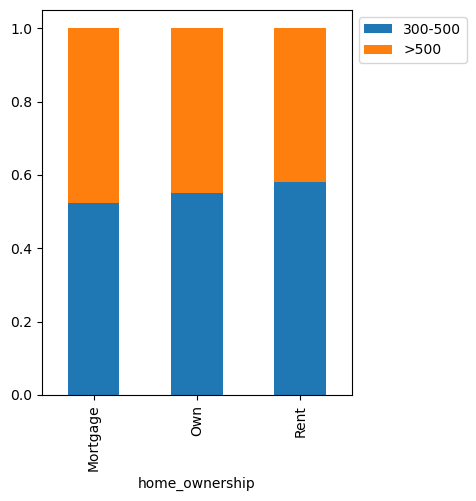

In [33]:
stacked_barplot(loan, "home_ownership", "FICO")

## Let us check if FICO has no effet on home_ownership.
For that we will use the Chi-Square test since the two variables are categoricals.
* the Null Hypothesis Ho = "FICO score has no a statistically significant effect on home ownership"  
* the Alternate Hypothesis Ha = "FICO score has a statistically significant effect on home ownership"  

In [34]:
crosstab = pd.crosstab(
    loan["FICO"], loan["home_ownership"]
)  # Contingency table of region and smoker attributes

Ho = " FICO score has no statistically significant effect on home ownership"  
Ha = "FICO score has a statistically significant effect on home ownership"  

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has a statistically significant effect on home ownership as the p_value (0.0) < 0.05


## age vs FICO

FICO   300-500  >500    All
age                        
All       6370  5178  11548
>25       2443  3217   5660
20-25     3927  1961   5888
------------------------------------------------------------------------------------------------------------------------


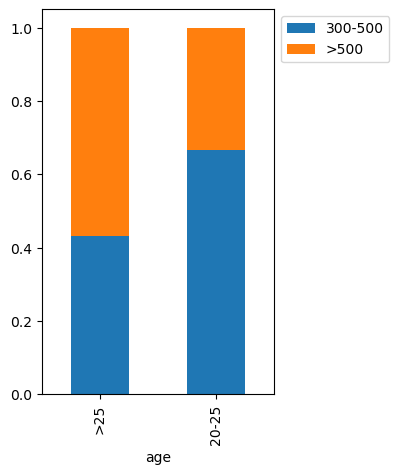

In [37]:
stacked_barplot(loan, "age", "FICO")

## Let us check if FICO has no effet on age.
For that we will use the Chi-Square test since the two variables are categoricals.

* the Null Hypothesis Ho = "FICO score has no a statistically significant effect on age"
* the Alternate Hypothesis Ha = "FICO score has a statistically significant effect on age"

In [35]:
crosstab = pd.crosstab(
    loan["FICO"], loan["age"]
)  # Contingency table of region and smoker attributes

Ho = "FICO score has no a statistically significant effect on age" 
Ha = "FICO score has a statistically significant effect on age"  

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has a statistically significant effect on age as the p_value (0.0) < 0.05


## gender vs FICO

FICO    300-500  >500    All
gender                      
All        6370  5178  11548
Male       3705  2850   6555
Female     2665  2328   4993
------------------------------------------------------------------------------------------------------------------------


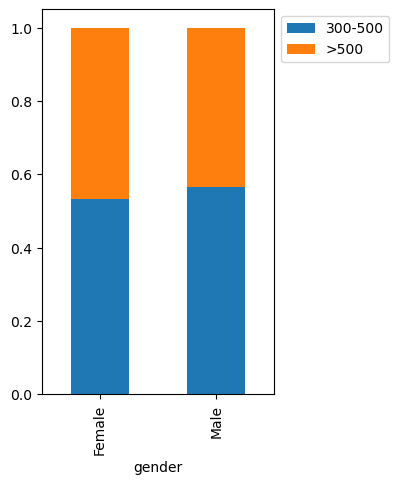

In [36]:
stacked_barplot(loan, "gender", "FICO")

## Let us check if FICO has no effet on gender.
For that we will use the Chi-Square test since the two variables are categoricals.

* the Null Hypothesis Ho = "FICO score has no a statistically significant effect on gender"
* the Alternate Hypothesis Ha = "FICO score has a statistically significant effect on gender"

In [38]:
crosstab = pd.crosstab(
    loan["FICO"], loan["gender"]
)  # Contingency table of region and smoker attributes

Ho = "FICO score has no a statistically significant effect on gender"  
Ha = "FICO score has a statistically significant effect on gender"  

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has a statistically significant effect on gender as the p_value (0.001) < 0.05


## Observations

* P-value for all tests < 0.05. Hence, all the differences that we see in the 3 plots are statistically significant.
* There is a correlation between FICO Score and house_ownership. People who have mortgaged their houses have higher FICO scores than people who own the house (peculiar!).
* There is a correlation between FICO Score and gender. More females have >500 FICO scores as compared to Males.
* There is a correlation between FICO Score and age. People >25 years of age have higher FICO scores as compared to people of age 20-25. 

### Data Preparation

In [39]:
x = loan.drop(["isDelinquent"], axis=1)
y = loan["isDelinquent"]

In [40]:
# encoding the categorical variables
x = pd.get_dummies(x, drop_first=True)
x.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


In [41]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6928, 11) (2310, 11) (2310, 11)


In [42]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6928
Number of rows in validation data = 2310
Number of rows in test data = 2310


## Building the model

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression 

In [45]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

## Let's evaluate the model performance by using KFold and cross_val_score

K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

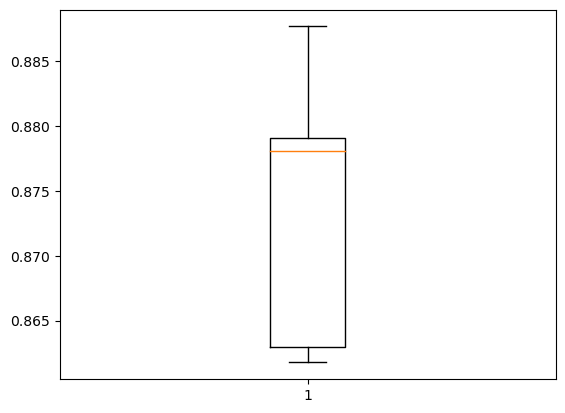

In [46]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.86 to 0.87 recall.
* Let's check the performance on validation data.

In [47]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.782621,0.872409,0.815375,0.842929


In [48]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.797403,0.891909,0.820727,0.854839


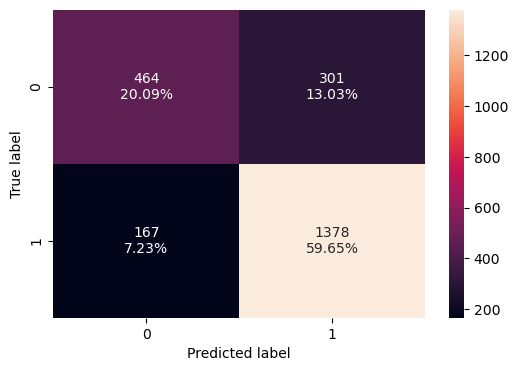

In [49]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.


###  let's check the performance of test data

In [50]:
# Calculating different metrics on validation set
log_reg_model_test_perf = model_performance_classification_sklearn(
    lr, X_test, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.789177,0.88342,0.816278,0.848523


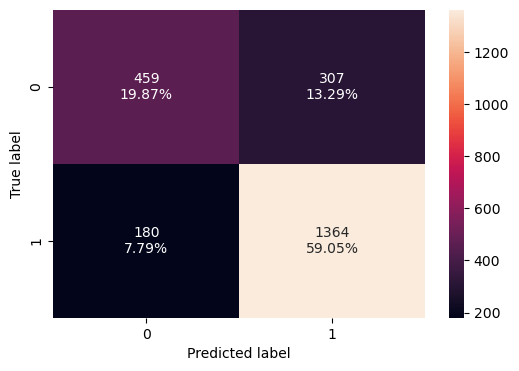

In [51]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_test, y_test)

- Model has given generalised performance on the test set

### Finding the coefficients

In [52]:
# let us check the coefficients and intercept of the model (lin. and log. reg. sklearn)

coef_df = pd.DataFrame(
    np.append(lr.coef_, lr.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500,Intercept
Coefficients,-2.034932,0.793433,0.095047,0.424505,-0.039917,0.18339,0.058346,0.105054,-0.088284,0.565059,-1.981831,1.15384


### Coefficient interpretations

* Coefficient of gender_Male, purpose_House, purpose_Medical, etc are positive, increase in these will lead to an increase in chances of a person being delinquent 
* Coefficient of term_60 months, purpose_Other, home_ownership_Rent, etc increase in these will lead to a decrease in chances of a person not being delinquent 

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [53]:
odds = np.exp(lr.coef_[0])  # converting coefficients to odds
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
pd.DataFrame(
    odds, X_train.columns, columns=["odds"]
).T  # adding the odds to a dataframe

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
odds,0.130689,2.210974,1.099711,1.528833,0.960869,1.201283,1.060082,1.110771,0.915501,1.759551,0.137817


* Percentage change in odds

In [54]:
perc_change_odds = (np.exp(lr.coef_[0]) - 1) * 100  # finding the percentage change
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
pd.DataFrame(
    perc_change_odds, X_train.columns, columns=["change_odds%"]
).T  # adding the change_odds% to a dataframe

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
change_odds%,-86.931068,121.097447,9.971089,52.883284,-3.913081,20.128295,6.008209,11.077107,-8.449873,75.955084,-86.218331


### Conclusion

After our analysis, we conclude that not only does FICO have an impact on the delinquency of loans, but also other factors that influence the non-payment of loans such as age, gender, or even the term of loan. Furthermore, the odds of a person with a FICO score above 500 being a delinquent customer is 0.13 times less than a customer with a FICO score between 300 to 500 or 86% lower than a customer with a FICO score between 300 to 500

## Business Insights

* FICO, term and gender are the  important variables in determining if a borrower will get into a delinquent stage 
* No borrower shall be given a loan if they are applying for a 36-month term loan and have a FICO score in the range of 300-500.
